# 4 编写结构化程序

现在，你对Python 编程语言处理自然语言的能力已经有了体会。不过，如果你是Python或者编程新手，你可能仍然要努力对付Python，而尚未感觉到你在完全控制它。在这一章中，我们将解决以下问题：

1. 怎么能写出结构良好、可读的程序，你和其他人将能够很容易的重新使用它？
2. 基本结构块，如循环、函数以及赋值，是如何执行的？
3. Python 编程的陷阱有哪些，你怎么能避免它们吗？

一路上，你将巩固基本编程结构的知识，了解更多关于以一种自然和简洁的方式使用Python语言特征的内容，并学习一些有用的自然语言数据可视化技术。如前所述，本章包含许多例子和练习（和以前一样，一些练习会引入新材料）。编程新手的读者应仔细做完它们，并在需要时查询其他编程介绍；有经验的程序员可以快速浏览本章。

在这本书的其他章节中，为了讲述NLP的需要，我们已经组织了一些编程的概念。在这里，我们回到一个更传统的方法，材料更紧密的与编程语言的结构联系在一起。这里不会完整的讲述编程语言，我们只关注对NLP最重要的语言结构和习惯用法。

<a href="#41-回到基础">4.1 回到基础</a>

<a href="#42-序列">4.2 序列</a>

<a href="#43-风格的问题">4.3 风格的问题</a>

<a href="#44-函数-结构化编程的基础">4.4 函数：结构化编程的基础</a>

<a href="#45-更多关于函数">4.5 更多关于函数</a>

<a href="#46-程序开发">4.6 程序开发</a>

<a href="#47-算法设计">4.7 算法设计</a>

## 4.1 回到基础

<a href="#赋值">1. 赋值</a>

<a href="#等式">2. 等式</a>

<a href="#条件">3. 条件</a>

### 赋值

赋值似乎是最基本的编程概念，不值得单独讨论。不过，也有一些令人吃惊的微妙之处。思考下面的代码片段：

In [1]:
foo = 'Monty'
bar = foo # 1
foo = 'Python' # 2
bar

'Monty'

这个结果与预期的完全一样。当我们在上面的代码中写`bar = foo`时 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#assignment1)，`foo`的值（字符串`'Monty'`）被赋值给`bar`。也就是说，`bar`是`foo`的一个副本，所以当我们在第 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#assignment2)行用一个新的字符串`'Python'`覆盖`foo`时，`bar`的值不会受到影响。

然而，赋值语句并不总是以这种方式复制副本。赋值总是一个表达式的值的复制，但值并不总是你可能希望的那样。特别是结构化对象的“值”，例如一个列表，实际上是一个对象的引用。在下面的例子中， [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#assignment3)将`foo`的引用分配给新的变量`bar`。现在，当我们在 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#assignment4)行修改`foo`内的东西，我们可以看到`bar`的内容也已改变。

In [2]:
foo = ['Monty', 'Python']
bar = foo # 1
foo[1] = 'Bodkin' # 2
bar

['Monty', 'Bodkin']

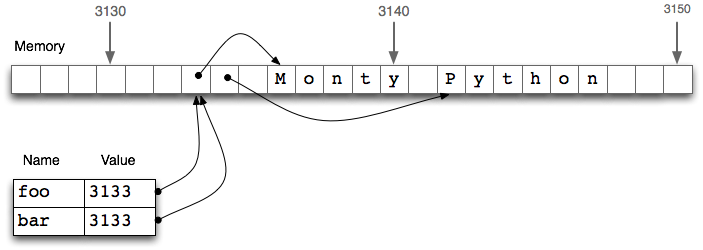

图 4.1：列表赋值与计算机内存：两个列表对象`foo`和`bar`引用计算机内存中的相同的位置；更新`foo`将同样修改`bar`，反之亦然。

`bar = foo` [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#assignment3)行并不会复制变量的内容，只有它的“引用对象”。要了解这里发生了什么事，我们需要知道列表是如何存储在计算机内存的。在[4.1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fig-array-memory)中，我们看到一个列表`foo`是对存储在位置3133处的一个对象的引用（它自身是一个指针序列，其中的指针指向其它保存字符串的位置）。当我们赋值`bar = foo`时，仅仅是3133位置处的引用被复制。这种行为延伸到语言的其他方面，如参数传递（[4.4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-functions)）。

让我们做更多的实验，通过创建一个持有空列表的变量`empty`，然后在下一行使用它三次。

In [3]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [4]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

请看，改变列表中嵌套列表内的一个项目，它们全改变了。这是因为三个元素中的每一个实际上都只是一个内存中的同一列表的引用。

注意

**轮到你来：** 用乘法创建一个列表的列表：`nested = [[]] * 3`。现在修改列表中的一个元素，观察所有的元素都改变了。使用Python的`id()`函数找出任一对象的数字标识符， 并验证`id(nested[0])`，`id(nested[1])`与`id(nested[2])`是一样的。

现在请注意，当我们分配一个新值给列表中的一个元素时，它并不会传送给其他元素：

In [5]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

我们一开始用含有3个引用的列表，每个引用指向一个空列表对象。然后，我们通过给它追加`'Python'`修改这个对象，结果变成包含3个到一个列表对象`['Python']`的引用的列表。下一步，我们使用到一个新对象`['Monty']`的引用来*覆盖*三个元素中的一个。这最后一步修改嵌套列表内的3个对象引用中的1个。然而，`['Python']`对象并没有改变，仍然是在我们的嵌套列表的列表中的两个位置被引用。关键是要明白通过一个对象引用修改一个对象与通过覆盖一个对象引用之间的区别。

注意

**重要：** 要从列表`foo`复制项目到一个新的列表`bar`，你可以写`bar = foo[:]`。这会复制列表中的对象引用。若要复制结构而不复制任何对象引用，请使用`copy.deepcopy()`。

### 等式

Python提供两种方法来检查一对项目是否相同。`is`操作符测试对象的ID。我们可以用它来验证我们早先的对对象的观察。首先，我们创建一个列表，其中包含同一对象的多个副本，证明它们不仅对于`==`完全相同，而且它们是同一个对象：

In [6]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [7]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

现在，让我们将一个新的python放入嵌套中。我们可以很容易地表明这些对象不完全相同:

In [8]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [9]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [10]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

你可以再做几对测试，发现哪个位置包含闯入者，函数`id()`使检测更加容易：

In [11]:
[id(snake) for snake in snake_nest]

[2322472289984, 2322472289984, 2322472289984, 2322472231040, 2322472289984]

这表明列表中的第二个项目有一个独特的标识符。如果你尝试自己运行这段代码，请期望看到结果列表中的不同数字，以及闯入者可能在不同的位置。

有两种等式可能看上去有些奇怪。然而，这真的只是类型与标识符式的区别，与自然语言相似，这里在一种编程语言中呈现出来。

### 条件

在`if`语句的条件部分，一个非空字符串或列表被求值为真，而一个空字符串或列表的被求值为假。

In [13]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


也就是说，我们*不必*在条件中写`if len(element) > 0:`。

使用`ifelif`而不是在一行中使用两个`if`语句有什么区别？嗯，考虑以下情况：

In [14]:
animals = ['cat', 'dog']
if 'cat' in animals:
    print(1)
elif 'dog' in animals:
    print(2)


1


因为表达式中`if`子句条件满足，Python就不会求值`elif`子句，所以我们永远不会得到输出`2`。相反，如果我们用一个`if`替换`elif`，那么我们将会输出`1`和`2`。所以`elif`子句比单独的`if`子句潜在地给我们更多信息；当它被判定为真时，告诉我们不仅条件满足而且前面的`if`子句条件*不*满足。

`all()`函数和`any()`函数可以应用到一个列表（或其他序列），来检查是否全部或任一项目满足某个条件：

In [15]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [16]:
any(len(w) > 4 for w in sent)

True

## 4.2 序列

<a href="#序列类型上的操作">1. 序列类型上的操作</a>

<a href="#合并不同类型的序列">2. 合并不同类型的序列</a>

<a href="#生成器表达式">3. 生成器表达式</a>

到目前为止，我们已经看到了两种序列对象：字符串和列表。另一种序列被称为元组。元组由逗号操作符 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#create-tuple)构造，而且通常使用括号括起来。实际上，我们已经在前面的章节中看到过它们，它们有时也被称为“配对”，因为总是有两名成员。然而，元组可以有任何数目的成员。与列表和字符串一样，元组可以被索引 # [2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#index-tuple)和切片 # [3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#slice-tuple)，并有长度 # [4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#length-tuple)。

In [17]:
t = 'walk', 'fem', 3 # 1
t

('walk', 'fem', 3)

In [18]:
t[0] # 2

'walk'

In [19]:
t[1:] # 3

('fem', 3)

In [20]:
len(t) # 4

3

小心！

元组使用逗号操作符来构造。括号是一个Python语法的一般功能，设计用于分组。定义一个包含单个元素`'snark'`的元组是通过添加一个尾随的逗号，像这样："`'snark',`"。空元组是一个特殊的情况下，使用空括号`()`定义。

让我们直接比较字符串、列表和元组，在各个类型上做索引、切片和长度操作：

In [21]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [22]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [23]:
len(raw), len(text), len(pair)

(29, 5, 2)

请注意在此代码示例中，我们在一行代码中计算多个值，中间用逗号分隔。这些用逗号分隔的表达式其实就是元组——如果没有歧义，Python允许我们忽略元组周围的括号。当我们输出一个元组时，括号始终显示。通过以这种方式使用元组，我们隐式的将这些项目聚集在一起。

### 序列类型上的操作

我们可以用多种有用的方式遍历一个序列`s`中的项目，如 [4.1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#tab-python-sequence)所示。

表 4.1：

遍历序列的各种方式

In [26]:
from nltk import word_tokenize # 导入 nltk 库

raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw) # word_tokenize 的作用是分词
fdist = nltk.FreqDist(text) #  FreqDist 频差
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [27]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

lorry: 4; ,: 3; yellow: 2; Red: 1; red: 1; .: 1; 

在接下来的例子中，我们使用元组重新安排我们的列表中的内容。（可以省略括号，因为逗号比赋值的优先级更高。）

In [28]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

这是一种地道和可读的移动列表内的项目的方式。它相当于下面的传统方式不使用元组做上述任务（注意这种方法需要一个临时变量`tmp`）。

In [29]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp

正如我们已经看到的，Python有序列处理函数，如`sorted()`和`reversed()`，它们重新排列序列中的项目。也有修改序列结构的函数，可以很方便的处理语言。因此，`zip()`接收两个或两个以上的序列中的项目，将它们“压缩”打包成单个的配对列表。给定一个序列`s`，`enumerate(s)`返回一个包含索引和索引处项目的配对。

In [30]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [31]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [32]:
list(enumerate(words)) # 枚举

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

注意

只在需要的时候进行计算（或者叫做“惰性计算”特性），这是Python 3和NLTK 3的一个普遍特点。当你期望看到一个序列时，如果你看到的却是类似`<zip object at 0x10d005448>`这样的结果， 你可以强制求值这个对象，只要把它放在一个期望序列的上下文中，比如`list(`x`)`或`for item in` x。

对于一些NLP任务，有必要将一个序列分割成两个或两个以上的部分。例如，我们可能需要用90％的数据来“训练”一个系统，剩余10％进行测试。要做到这一点，我们指定想要分割数据的位置 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#cut-location)，然后在这个位置分割序列 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#cut-sequence)。

In [33]:
text = nltk.corpus.nps_chat.words() # nps_chat 词汇列表的使用
cut = int(0.9 * len(text)) # 1
training_data, test_data = text[:cut], text[cut:] # 2
text == training_data + test_data # 3

True

In [34]:
len(training_data) / len(test_data) # 4

9.0

我们可以验证在此过程中的原始数据没有丢失，也没有重复 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#cut-preserve)。我们也可以验证两块大小的比例是我们预期的 [# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#cut-ratio)。

### 合并不同类型的序列

让我们综合关于这三种类型的序列的知识，一起使用列表推导处理一个字符串中的词，按它们的长度排序。

In [35]:
words = 'I turned off the spectroroute'.split() # 1
wordlens = [(len(word), word) for word in words] # 2
wordlens.sort() # 3
' '.join(w for (_, w) in wordlens) # 4

'I off the turned spectroroute'

上述代码段中每一行都包含一个显著的特征。一个简单的字符串实际上是一个其上定义了方法如`split()`  [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#string-object)的对象。我们使用列表推导建立一个元组的列表 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#tuple-comprehension)，其中每个元组由一个数字（词长）和这个词组成，例如`(3, 'the')`。我们使用`sort()`方法 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sort-method)就地排序列表。最后，丢弃长度信息，并将这些词连接回一个字符串 [# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#discard-length)。（下划线 [# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#discard-length)只是一个普通的Python变量，我们约定可以用下划线表示我们不会使用其值的变量。）

我们开始谈论这些序列类型的共性，但上面的代码说明了这些序列类型的重要的区别。首先，字符串出现在开头和结尾：这是很典型的，我们的程序先读一些文本，最后产生输出给我们看。列表和元组在中间，但使用的目的不同。一个链表是一个典型的具有相同类型的对象的序列，它的长度是任意的。我们经常使用列表保存词序列。相反，一个元组通常是不同类型的对象的集合，长度固定。我们经常使用一个元组来保存一个纪录，与一些实体相关的不同字段的集合。使用列表与使用元组之间的区别需要一些时间来习惯，所以这里是另一个例子：

In [36]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]

在这里，用一个列表表示词典，因为它是一个单一类型的对象的集合——词汇条目——没有预定的长度。个别条目被表示为一个元组，因为它是一个有不同的解释的对象的集合，例如正确的拼写形式、词性、发音（以SAMPA计算机可读的拼音字母表示，`http://www.phon.ucl.ac.uk/home/sampa/`）。请注意，这些发音都是用列表存储的。（为什么呢？）

注意

决定何时使用元组还是列表的一个好办法是看一个项目的内容是否取决与它的位置。例如，一个已标注的词标识符由两个具有不同解释的字符串组成，我们选择解释第一项为词标识符，第二项为标注。因此，我们使用这样的元组：`('grail', 'noun')`；一个形式为`('noun', 'grail')`的元组将是无意义的，因为这将是一个词`noun`被标注为`grail`。相反，一个文本中的元素都是词符， 位置并不重要。因此， 我们使用这样的列表：`['venetian', 'blind']`；一个形式为`['blind', 'venetian']`的列表也同样有效。词的语言学意义可能会有所不同，但作为词符的列表项的解释是不变的。

列表和元组之间的使用上的区别已经讲过了。然而，还有一个更加基本的区别：在Python中，列表是可变的，而元组是不可变的。换句话说，列表可以被修改，而元组不能。这里是一些在列表上的操作，就地修改一个列表。

In [37]:
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

注意

**轮到你来：**使用`lexicon = tuple(lexicon)`将`lexicon`转换为一个元组，然后尝试上述操作，确认它们都不能运用在元组上。

### 生成器表达式

我们一直在大量使用列表推导，因为用它处理文本结构紧凑和可读性好。下面是一个例子，分词和规范化一个文本：

In [38]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

假设我们现在想要进一步处理这些词。我们可以将上面的表达式插入到一些其他函数的调用中 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#max-comprehension)，Python允许我们省略方括号 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#max-generator)。

In [39]:
max([w.lower() for w in word_tokenize(text)]) # 1

'word'

In [40]:
max(w.lower() for w in word_tokenize(text)) # 2

'word'

第二行使用了生成器表达式。这不仅仅是标记方便：在许多语言处理的案例中，生成器表达式会更高效。在 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#max-comprehension)中，列表对象的存储空间必须在max()的值被计算之前分配。如果文本非常大的，这将会很慢。在 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#max-generator)中，数据流向调用它的函数。由于调用的函数只是简单的要找最大值——按字典顺序排在最后的词——它可以处理数据流，而无需存储迄今为止的最大值以外的任何值。

## 4.3 风格的问题

编程是作为一门科学的艺术。无可争议的程序设计的“圣经”，Donald Knuth 的2500页的多卷作品，叫做《计算机程序设计艺术》。已经有许多书籍是关于文学化编程的，它们认为人类，不只是电脑，必须阅读和理解程序。在这里，我们挑选了一些编程风格的问题，它们对你的代码的可读性，包括代码布局、程序与声明的风格、使用循环变量都有重要的影响。

<a href="#python代码风格">1. Python代码风格</a>

<a href="#过程风格与声明风格">2. 过程风格与声明风格</a>

<a href="#计数器的一些合理用途">3. 计数器的一些合理用途</a>

### Python代码风格

编写程序时，你会做许多微妙的选择：名称、间距、注释等等。当你在看别人编写的代码时，风格上的不必要的差异使其难以理解。因此，Python 语言的设计者发表了Python代码风格指南，http`http://www.python.org/dev/peps/pep-0008/`。风格指南中提出的基本价值是一致性，目的是最大限度地提高代码的可读性。我们在这里简要回顾一下它的一些主要建议，并请读者阅读完整的指南，里面有对实例的详细的讨论。

代码布局中每个缩进级别应使用4个空格。你应该确保当你在一个文件中写Python代码时，避免使用tab缩进，因为它可能由于不同的文本编辑器的不同解释而产生混乱。每行应少于80个字符长；如果必要的话，你可以在圆括号、方括号或花括号内换行，因为Python能够探测到该行与下一行是连续的。如果你需要在圆括号、方括号或大括号中换行，通常可以添加额外的括号，也可以在行尾需要换行的地方添加一个反斜杠：

In [ ]:
if (len(syllables) > 4 and len(syllables[2]) == 3 and
    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
    process(syllables)
if len(syllables) > 4 and len(syllables[2]) == 3 and \
    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]:
    process(syllables)

注意

键入空格来代替制表符很快就会成为一件苦差事。许多程序编辑器内置对Python的支持，能自动缩进代码，突出任何语法错误（包括缩进错误）。关于Python编辑器列表，请见`http://wiki.python.org/moin/PythonEditors`。

### 过程风格与声明风格

我们刚才已经看到可以不同的方式执行相同的任务，其中蕴含着对执行效率的影响。另一个影响程序开发的因素是*编程风格*。思考下面的计算布朗语料库中词的平均长度的程序：

In [45]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

在这段程序中，我们使用变量`count`跟踪遇到的词符的数量，`total`储存所有词的长度的总和。这是一个低级别的风格，与机器代码，即计算机的CPU 所执行的基本操作，相差不远。两个变量就像CPU的两个寄存器，积累许多中间环节产生的值，和直到最才有意义的值。我们说，这段程序是以*过程*风格编写，一步一步口授机器操作。现在，考虑下面的程序，计算同样的事情：

In [46]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


第一行使用生成器表达式累加标示符的长度，第二行像前面一样计算平均值。每行代码执行一个完整的、有意义的工作，可以高级别的属性，如：“`total`是标识符长度的总和”，的方式来理解。实施细节留给Python解释器。第二段程序使用内置函数，在一个更抽象的层面构成程序；生成的代码是可读性更好。让我们看一个极端的例子：

In [ ]:
word_list = [] # 这个例子太极端了，跑一分钟还没出结果，跳过
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
    i += 1

等效的声明版本使用熟悉的内置函数，可以立即知道代码的目的：

In [48]:
word_list = sorted(set(tokens))

另一种情况，对于每行输出一个计数值，一个循环计数器似乎是必要的。然而，我们可以使用`enumerate()`处理序列`s`，为`s`中每个项目产生一个`(i, s[i])`形式的元组，以`(0, s[0])`开始。下面我们枚举频率分布的值，生成嵌套的`(rank, (word, count))`元组。按照产生排序项列表时的需要，输出`rank+1`使计数从`1`开始。

In [49]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


到目前为止，使用循环变量存储最大值或最小值，有时很诱人。让我们用这种方法找出文本中最长的词。

In [50]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

然而，一个更加清楚的解决方案是使用两个列表推导，它们的形式现在应该很熟悉：

In [51]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

请注意，我们的第一个解决方案找到第一个长度最长的词，而第二种方案找到*所有*最长的词（通常是我们想要的）。虽然有两个解决方案之间的理论效率的差异，主要的开销是到内存中读取数据；一旦数据准备好，第二阶段处理数据可以瞬间高效完成。我们还需要平衡我们对程序的效率与程序员的效率的关注。一种快速但神秘的解决方案将是更难理解和维护的。

### 计数器的一些合理用途

在有些情况下，我们仍然要在列表推导中使用循环变量。例如：我们需要使用一个循环变量中提取列表中连续重叠的n-grams：

In [52]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

确保循环变量范围的正确相当棘手的。因为这是NLP中的常见操作，NLTK提供了支持函数`bigrams(text)`、`trigrams(text)`和一个更通用的`ngrams(text, n)`。

下面是我们如何使用循环变量构建多维结构的一个例子。例如，建立一个*m*行*n*列的数组，其中每个元素是一个集合，我们可以使用一个嵌套的列表推导：

In [54]:
import pprint # 导入 pprint 库，美化输出

m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


请看循环变量`i`和`j`在产生对象过程中没有用到，它们只是需要一个语法正确的`for` 语句。这种用法的另一个例子，请看表达式`['very' for i in range(3)]`产生一个包含三个`'very'`实例的列表，没有整数。

请注意，由于我们前面所讨论的有关对象复制的原因，使用乘法做这项工作是不正确的。

In [55]:
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


迭代是一个重要的编程概念。采取其他语言中的习惯用法是很诱人的。然而， Python提供一些优雅和高度可读的替代品，正如我们已经看到。

## 4.4 函数 结构化编程的基础

<a href="#参数传递">1. 参数传递</a>

<a href="#变量的作用域">2. 变量的作用域</a>

<a href="#参数类型检查">3. 参数类型检查</a>

<a href="#功能分解">4. 功能分解</a>

<a href="#编写函数的文档">5. 编写函数的文档</a>

函数提供了程序代码打包和重用的有效途径，已经在[3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-reusing-code)中解释过。例如，假设我们发现我们经常要从HTML文件读取文本。这包括以下几个步骤，打开文件，将它读入，规范化空白符号，剥离HTML标记。我们可以将这些步骤收集到一个函数中，并给它一个名字，如`get_text()`，如[4.2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-get-text)所示。

In [56]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

现在，任何时候我们想从一个HTML文件得到干净的文字，都可以用文件的名字作为唯一的参数调用`get_text()`。它会返回一个字符串，我们可以将它指定给一个变量，例如：`contents = get_text("test.html")`。每次我们要使用这一系列的步骤，只需要调用这个函数。

使用函数可以为我们的程序节约空间。更重要的是，我们为函数选择名称可以提高程序*可读性*。在上面的例子中，只要我们的程序需要从文件读取干净的文本，我们不必弄乱这四行代码的程序，只需要调用`get_text()`。这种命名方式有助于提供一些“语义解释”——它可以帮助我们的程序的读者理解程序的“意思”。

请注意，上面的函数定义包含一个字符串。函数定义内的第一个字符串被称为文档字符串。它不仅为阅读代码的人记录函数的功能，从文件加载这段代码的程序员也能够访问：

In [ ]:
help(get_text)
Help on function get_text in module __main__:

get(text)
    Read text from a file, normalizing whitespace and stripping HTML markup.

我们首先定义函数的两个参数，`msg`和`num`  [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fun-def)。然后调用函数，并传递给它两个参数，`monty`和`3`  [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fun-call)；这些参数填补了参数提供的“占位符”，为函数体中出现的`msg`和`num`提供值。

我们看到在下面的例子中不需要有任何参数：

In [58]:
def monty():
    return "Monty Python"
monty()

'Monty Python'

函数通常会通过`return`语句将其结果返回给调用它的程序，正如我们刚才看到的。对于调用程序，它看起来就像函数调用已被函数结果替代，例如：

In [62]:
from itertools import repeat

repeat(monty(), 3)

repeat('Monty Python', 3)

In [63]:
repeat('Monty Python', 3)

repeat('Monty Python', 3)

一个Python函数并不是一定需要有一个return语句。有些函数做它们的工作的同时会附带输出结果、修改文件或者更新参数的内容。（这种函数在其他一些编程语言中被称为“过程”）。

考虑以下三个排序函数。第三个是危险的，因为程序员可能没有意识到它已经修改了给它的输入。一般情况下，函数应该修改参数的内容（`my_sort1()`）或返回一个值（`my_sort2()`），而不是两个都做（`my_sort3()`）。

In [64]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

### 参数传递

早在[4.1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-back-to-the-basics)节中，你就已经看到了赋值操作，而一个结构化对象的值是该对象的引用。函数也是一样的。Python按它的值来解释函数的参数（这被称为按值调用）。在下面的代码中，`set_up()`有两个参数，都在函数内部被修改。我们一开始将一个空字符串分配给`w`，将一个空列表分配给`p`。调用该函数后，`w`没有变，而`p`改变了：

In [65]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

w = ''
p = []
set_up(w, p)
w

''

In [66]:
p

['noun']

请注意，`w`没有被函数改变。当我们调用`set_up(w, p)`时，`w`（空字符串）的值被分配到一个新的变量`word`。在函数内部`word`值被修改。然而，这种变化并没有传播给`w`。这个参数传递过程与下面的赋值序列是一样的：

In [67]:
w = ''
word = w
word = 'lolcat'
w

''

让我们来看看列表`p`上发生了什么。当我们调用`set_up(w, p)`，`p`的值（一个空列表的引用）被分配到一个新的本地变量`properties`，所以现在这两个变量引用相同的内存位置。函数修改`properties`，而这种变化也反映在`p`值上，正如我们所看到的。函数也分配给properties一个新的值（数字`5`）；这并不能修改该内存位置上的内容，而是创建了一个新的局部变量。这种行为就好像是我们做了下列赋值序列：

In [68]:
p = []
properties = p
properties.append('noun')
properties = 5
p

['noun']

因此，要理解Python按值传递参数，只要了解它是如何赋值的就足够了。记住，你可以使用`id()`函数和`is`操作符来检查每个语句执行之后你对对象标识符的理解。

### 变量的作用域

函数定义为变量创建了一个新的局部的作用域。当你在函数体内部分配一个新的变量时，这个名字只在该函数内部被定义。函数体外或者在其它函数体内，这个名字是不可见的。这一行为意味着你可以选择变量名而不必担心它与你的其他函数定义中使用的名称冲突。

当你在一个函数体内部使用一个现有的名字时，Python解释器先尝试按照函数本地的名字来解释。如果没有发现，解释器检查它是否是一个模块内的全局名称。最后，如果没有成功，解释器会检查是否是Python内置的名字。这就是所谓的名称解析的LGB规则：本地（local），全局（global），然后内置（built-in）。

小心！

一个函数可以使用`global`声明创建一个新的全局变量。然而，这种做法应尽可能避免。在函数内部定义全局变量会导致上下文依赖性而限制函数的可移植性（或重用性）。一般来说，你应该使用参数作为函数的输入，返回值作为函数的输出。

### 参数类型检查

我们写程序时，Python不会强迫我们声明变量的类型，这允许我们定义参数类型灵活的函数。例如，我们可能希望一个标注只是一个词序列，而不管这个序列被表示为一个列表、元组（或是迭代器，一种新的序列类型，超出了当前的讨论范围）。

然而，我们常常想写一些能被他人利用的程序，并希望以一种防守的风格，当函数没有被正确调用时提供有益的警告。下面的`tag()`函数的作者假设其参数将始终是一个字符串。

In [69]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

tag('the')

'det'

In [70]:
tag('knight')

'noun'

In [71]:
tag(["'Tis", 'but', 'a', 'scratch']) # 1

'noun'

该函数对参数`'the'`和`'knight'`返回合理的值，传递给它一个列表 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#list-arg)，看看会发生什么——它没有抱怨，虽然它返回的结果显然是不正确的。此函数的作者可以采取一些额外的步骤来确保`tag()`函数的参数`word`是一个字符串。一种直白的做法是使用`if not type(word) is str`检查参数的类型，如果`word`不是一个字符串，简单地返回Python特殊的空值`None`。这是一个略微的改善，因为该函数在检查参数类型，并试图对错误的输入返回一个“特殊的”诊断结果。然而，它也是危险的，因为调用程序可能不会检测`None`是故意设定的“特殊”值，这种诊断的返回值可能被传播到程序的其他部分产生不可预测的后果。如果这个词是一个Unicode字符串这种方法也会失败。因为它的类型是`unicode`而不是`str`。这里有一个更好的解决方案，使用`assert`语句和Python的`basestring`的类型一起，它是`unicode`和`str`的共同类型。

In [72]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

如果`assert`语句失败，它会产生一个不可忽视的错误而停止程序执行。此外，该错误信息是容易理解的。程序中添加断言能帮助你找到逻辑错误，是一种防御性编程。一个更根本的方法是在本节后面描述的使用文档字符串为每个函数记录参数的文档。

### 功能分解

结构良好的程序通常都广泛使用函数。当一个程序代码块增长到超过10-20行，如果将代码分成一个或多个函数，每一个有明确的目的，这将对可读性有很大的帮助。这类似于好文章被划分成段，每段话表示一个主要思想。

函数提供了一种重要的抽象。它们让我们将多个动作组合成一个单一的复杂的行动，并给它关联一个名称。（比较我们组合动作go和bring back为一个单一的更复杂的动作fetch。）当我们使用函数时，主程序可以在一个更高的抽象水平编写，使其结构更透明，例如

In [ ]:
from flair.data_fetcher import NLPTaskDataFetcher # flair 是一个 NLP 框架 pip install flair==0.5 

data = load_corpus()
results = analyze(data)
present(results)

适当使用函数使程序更具可读性和可维护性。另外，重新实现一个函数已成为可能——使用更高效的代码替换函数体——不需要关心程序的其余部分。

思考[4.3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-freq-words1)中`freq_words`函数。它更新一个作为参数传递进来的频率分布的内容，并输出前n个最频繁的词的列表。

In [76]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html).get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

这个函数有几个问题。该函数有两个副作用：它修改了第二个参数的内容，并输出它已计算的结果的经过选择的子集。如果我们在函数内部初始化`FreqDist()`对象（在它被处理的同一个地方），并且去掉选择集而将结果显示给调用程序的话，函数会更容易理解和更容易在其他地方重用。考虑到它的任务是找出频繁的一个词，它应该只应该返回一个列表，而不是整个频率分布。在[4.4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-freq-words2)中，我们重构此函数，并通过去掉`freqdist`参数简化其接口。

In [77]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html).get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

`freq_words`函数的可读性和可用性得到改进。

注意

我们将`_`用作变量名。这是对任何其他变量没有什么不同，除了它向读者发出信号，我们没有使用它保存的信息。

### 编写函数的文档

如果我们已经将工作分解成函数分解的很好了，那么应该很容易使用通俗易懂的语言描述每个函数的目的，并且在函数的定义顶部的文档字符串中提供这些描述。这个说明不应该解释函数是如何实现的；实际上，应该能够不改变这个说明，使用不同的方法，重新实现这个函数。

对于最简单的函数，一个单行的文档字符串通常就足够了（见[4.2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-get-text)）。你应该提供一个在一行中包含一个完整的句子的三重引号引起来的字符串。对于不寻常的函数，你还是应该在第一行提供一个一句话总结，因为很多的文档字符串处理工具会索引这个字符串。它后面应该有一个空行，然后是更详细的功能说明（见`http://www.python.org/dev/peps/pep-0257/`的文档字符串约定的更多信息）。

文档字符串可以包括一个doctest块，说明使用的函数和预期的输出。这些都可以使用Python的`docutils`模块自动测试。文档字符串应当记录函数的每个参数的类型和返回类型。至少可以用纯文本来做这些。然而，请注意，NLTK使用Sphinx标记语言来记录参数。这种格式可以自动转换成富结构化的API文档（见`http://nltk.org/`），并包含某些“字段”的特殊处理，例如`param`，允许清楚地记录函数的输入和输出。[4.5](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-sphinx)演示了一个完整的文档字符串。

In [78]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

## 4.5 更多关于函数

本节将讨论更高级的特性，你在第一次阅读本章时可能更愿意跳过此节。

<a href="#作为参数的函数">1. 作为参数的函数</a>

<a href="#累计函数">2. 累计函数</a>

<a href="#高阶函数">3. 高阶函数</a>

<a href="#命名的参数">4. 命名的参数</a>

### 作为参数的函数

到目前为止，我们传递给函数的参数一直都是简单的对象，如字符串或列表等结构化对象。Python也允许我们传递一个函数作为另一个函数的参数。现在，我们可以抽象出操作，对相同数据进行不同操作。正如下面的例子表示的，我们可以传递内置函数`len()`或用户定义的函数`last_letter()`作为另一个函数的参数：

In [79]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]

extract_property(len)
[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

对象`len`和`last_letter`可以像列表和字典那样被传递。请注意，只有在我们调用该函数时，才在函数名后使用括号；当我们只是将函数作为一个对象，括号被省略。

Python提供了更多的方式来定义函数作为其他函数的参数，即所谓的lambda 表达式。试想在很多地方没有必要使用上述的`last_letter()`函数，因此没有必要给它一个名字。我们可以等价地写以下内容：

In [80]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

我们的下一个例子演示传递一个函数给`sorted()`函数。当我们用唯一的参数（需要排序的链表）调用后者，它使用内置的比较函数`cmp()`。然而，我们可以提供自己的排序函数，例如按长度递减排序。

In [81]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [ ]:
sorted(sent, cmp) # cmp() 是 python 2 的函数，python 3 废弃了，有兴趣可查询了解 python 3 的 richcmp 方法

In [ ]:
sorted(sent, lambda x, y: cmp(len(y), len(x)))

### 累计函数

这些函数以初始化一些存储开始，迭代和处理输入的数据，最后返回一些最终的对象（一个大的结构或汇总的结果）。做到这一点的一个标准的方式是初始化一个空链表，累计材料，然后返回这个链表，如[4.6](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-search-examples)中所示函数`search1()`。

In [84]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

函数`search2()`是一个生成器。第一次调用此函数，它运行到`yield`语句然后停下来。调用程序获得第一个词，完成任何必要的处理。一旦调用程序对另一个词做好准备，函数会从停下来的地方继续执行，直到再次遇到`yield`语句。这种方法通常更有效，因为函数只产生调用程序需要的数据，并不需要分配额外的内存来存储输出（参见前面关于生成器表达式的讨论）。

下面是一个更复杂的生成器的例子，产生一个词列表的所有排列。为了强制`permutations()`函数产生所有它的输出，我们将它包装在`list()`调用中 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#listperm)。

In [85]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo'])) 

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

注意

`permutations`函数使用了一种技术叫递归，将在下面[4.7](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-algorithm-design)讨论。产生一组词的排列对于创建测试一个语法的数据十分有用（[8.](https://usyiyi.github.io/nlp-py-2e-zh/ch08.html#chap-parse))。

### 高阶函数

Python提供一些具有函数式编程语言如Haskell标准特征的高阶函数。我们将在这里演示它们，与使用列表推导的相对应的表达一起。

让我们从定义一个函数`is_content_word()`开始，它检查一个词是否来自一个开放的实词类。我们使用此函数作为`filter()`的第一个参数，它对作为它的第二个参数的序列中的每个项目运用该函数，只保留该函数返回`True`的项目。

In [86]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [87]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

另一个高阶函数是`map()`，将一个函数运用到一个序列中的每一项。它是我们在[4.5](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-doing-more-with-functions)看到的函数`extract_property()`的一个通用版本。这里是一个简单的方法找出布朗语料库新闻部分中的句子的平均长度，后面跟着的是使用列表推导计算的等效版本：

In [88]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [89]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

在上面的例子中，我们指定了一个用户定义的函数`is_content_word()` 和一个内置函数`len()`。我们还可以提供一个lambda 表达式。这里是两个等效的例子，计数每个词中的元音的数量。

In [ ]:
list(map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent)) # filter 对象不支持 len() 操作

In [ ]:
[len(c for c in w if c.lower() in "aeiou") for w in sent] # generator 对象不支持 len() 操作

列表推导为基础的解决方案通常比基于高阶函数的解决方案可读性更好，我们在整个这本书的青睐于使用前者。

### 命名的参数

当有很多参数时，很容易混淆正确的顺序。我们可以通过名字引用参数，甚至可以给它们分配默认值以供调用程序没有提供该参数时使用。现在参数可以按任意顺序指定，也可以省略。

In [92]:
def repeat(msg='<empty>', num=1):
    return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [93]:
repeat(msg='Alice')

'Alice'

In [94]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

这些被称为关键字参数。如果我们混合使用这两种参数，就必须确保未命名的参数在命名的参数前面。必须是这样，因为未命名参数是根据位置来定义的。我们可以定义一个函数，接受任意数量的未命名和命名参数，并通过一个就地的参数列表`*args`和一个就地的关键字参数字典`**kwargs`来访问它们。（字典将在[3](https://usyiyi.github.io/nlp-py-2e-zh/ch05.html#sec-dictionaries)中讲述。）

In [95]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


当`*args`作为函数参数时，它实际上对应函数所有的未命名参数。下面是另一个这方面的Python语法的演示，处理可变数目的参数的函数`zip()`。我们将使用变量名`*song`来表示名字`*args`并没有什么特别的。

In [96]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [97]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

应该从这个例子中明白输入`*song`仅仅是一个方便的记号，相当于输入了`song[0], song[1], song[2]`。

下面是另一个在函数的定义中使用关键字参数的例子，有三种等效的方法来调用这个函数：

In [ ]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)
fw = freq_words('ch01.rst', 4, 10) # 全文没提到过 .rst 文件的来源
fw = freq_words('ch01.rst', min=4, num=10)
fw = freq_words('ch01.rst', num=10, min=4)

命名参数的另一个作用是它们允许选择性使用参数。因此，我们可以在我们高兴使用默认值的地方省略任何参数：`freq_words('ch01.rst', min=4)`, `freq_words('ch01.rst', 4)`。可选参数的另一个常见用途是作为标志使用。这里是同一个的函数的修订版本，如果设置了`verbose`标志将会报告其进展情况：

In [99]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

小心！

注意不要使用可变对象作为参数的默认值。这个函数的一系列调用将使用同一个对象，有时会出现离奇的结果，就像我们稍后会在关于调试的讨论中看到的那样。

小心！

如果你的程序将使用大量的文件，它是一个好主意来关闭任何一旦不再需要的已经打开的文件。如果你使用`with`语句，Python会自动关闭打开的文件︰

In [ ]:
with open("lexicon.txt") as f: # 又一个没有来源的例子
    data = f.read()
    # process the data

## 4.6 程序开发

编程是一种技能，需要获得几年的各种编程语言和任务的经验。关键的高层次能力是*算法设计*及其在*结构化编程*中的实现。关键的低层次的能力包括熟悉语言的语法结构，以及排除故障的程序（不能表现预期的行为的程序）的各种诊断方法的知识。

本节描述一个程序模块的内部结构，以及如何组织一个多模块的程序。然后描述程序开发过程中出现的各种错误，你可以做些什么来解决这些问题，更好的是，从一开始就避免它们。

<a href="#python模块的结构">1. Python模块的结构</a>

<a href="#多模块程序">2. 多模块程序</a>

<a href="#错误源头">3. 错误源头</a>

<a href="#调试技术">4. 调试技术</a>

<a href="#防御性编程">5. 防御性编程</a>

### Python模块的结构

程序模块的目的是把逻辑上相关的定义和函数结合在一起，以方便重用和更高层次的抽象。Python 模块只是一些单独的`.py`文件。例如，如果你在处理一种特定的语料格式，读取和写入这种格式的函数可以放在一起。这两种格式所使用的常量，如字段分隔符或一个`EXTN = ".inf"`文件扩展名，可以共享。如果要更新格式，你就会知道只有一个文件需要改变。类似地，一个模块可以包含用于创建和操纵一种特定的数据结构如语法树的代码，或执行特定的处理任务如绘制语料统计图表的代码。

当你开始编写Python模块，有一些例子来模拟是有益的。你可以使用变量`__file__`定位你的系统中任一NLTK模块的代码，例如：

In [ ]:
nltk.metrics.distance.__file__
'/usr/lib/python2.5/site-packages/nltk/metrics/distance.pyc'

这将返回模块已编译`.pyc`文件的位置，在你的机器上你可能看到的位置不同。你需要打开的文件是对应的`.py`源文件，它和`.pyc`文件放在同一目录下。另外，你可以在网站上查看该模块的最新版本`http://code.google.com/p/nltk/source/browse/trunk/nltk/nltk/metrics/distance.py`。

与其他NLTK的模块一样，`distance.py`以一组注释行开始，包括一行模块标题和作者信息。（由于代码会被发布，也包括代码可用的URL、版权声明和许可信息。）接下来是模块级的文档字符串，三重引号的多行字符串，其中包括当有人输入`help(nltk.metrics.distance)`将被输出的关于模块的信息。

In [ ]:
# Natural Language Toolkit: Distance Metrics
#
# Copyright (C) 2001-2013 NLTK Project
# Author: Edward Loper <edloper@gmail.com>
#         Steven Bird <stevenbird1@gmail.com>
#         Tom Lippincott <tom@cs.columbia.edu>
# URL: <http://nltk.org/>
# For license information, see LICENSE.TXT
#

"""
Distance Metrics.

Compute the distance between two items (usually strings).
As metrics, they must satisfy the following three requirements:

1. d(a, a) = 0
2. d(a, b) >= 0
3. d(a, c) <= d(a, b) + d(b, c)
"""

### 多模块程序

一些程序汇集多种任务，例如从语料库加载数据、对数据进行一些分析、然后将其可视化。我们可能已经有了稳定的模块来加载数据和实现数据可视化。我们的工作可能会涉及到那些分析任务的编码，只是从现有的模块调用一些函数。[4.7](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fig-multi-module)描述了这种情景。

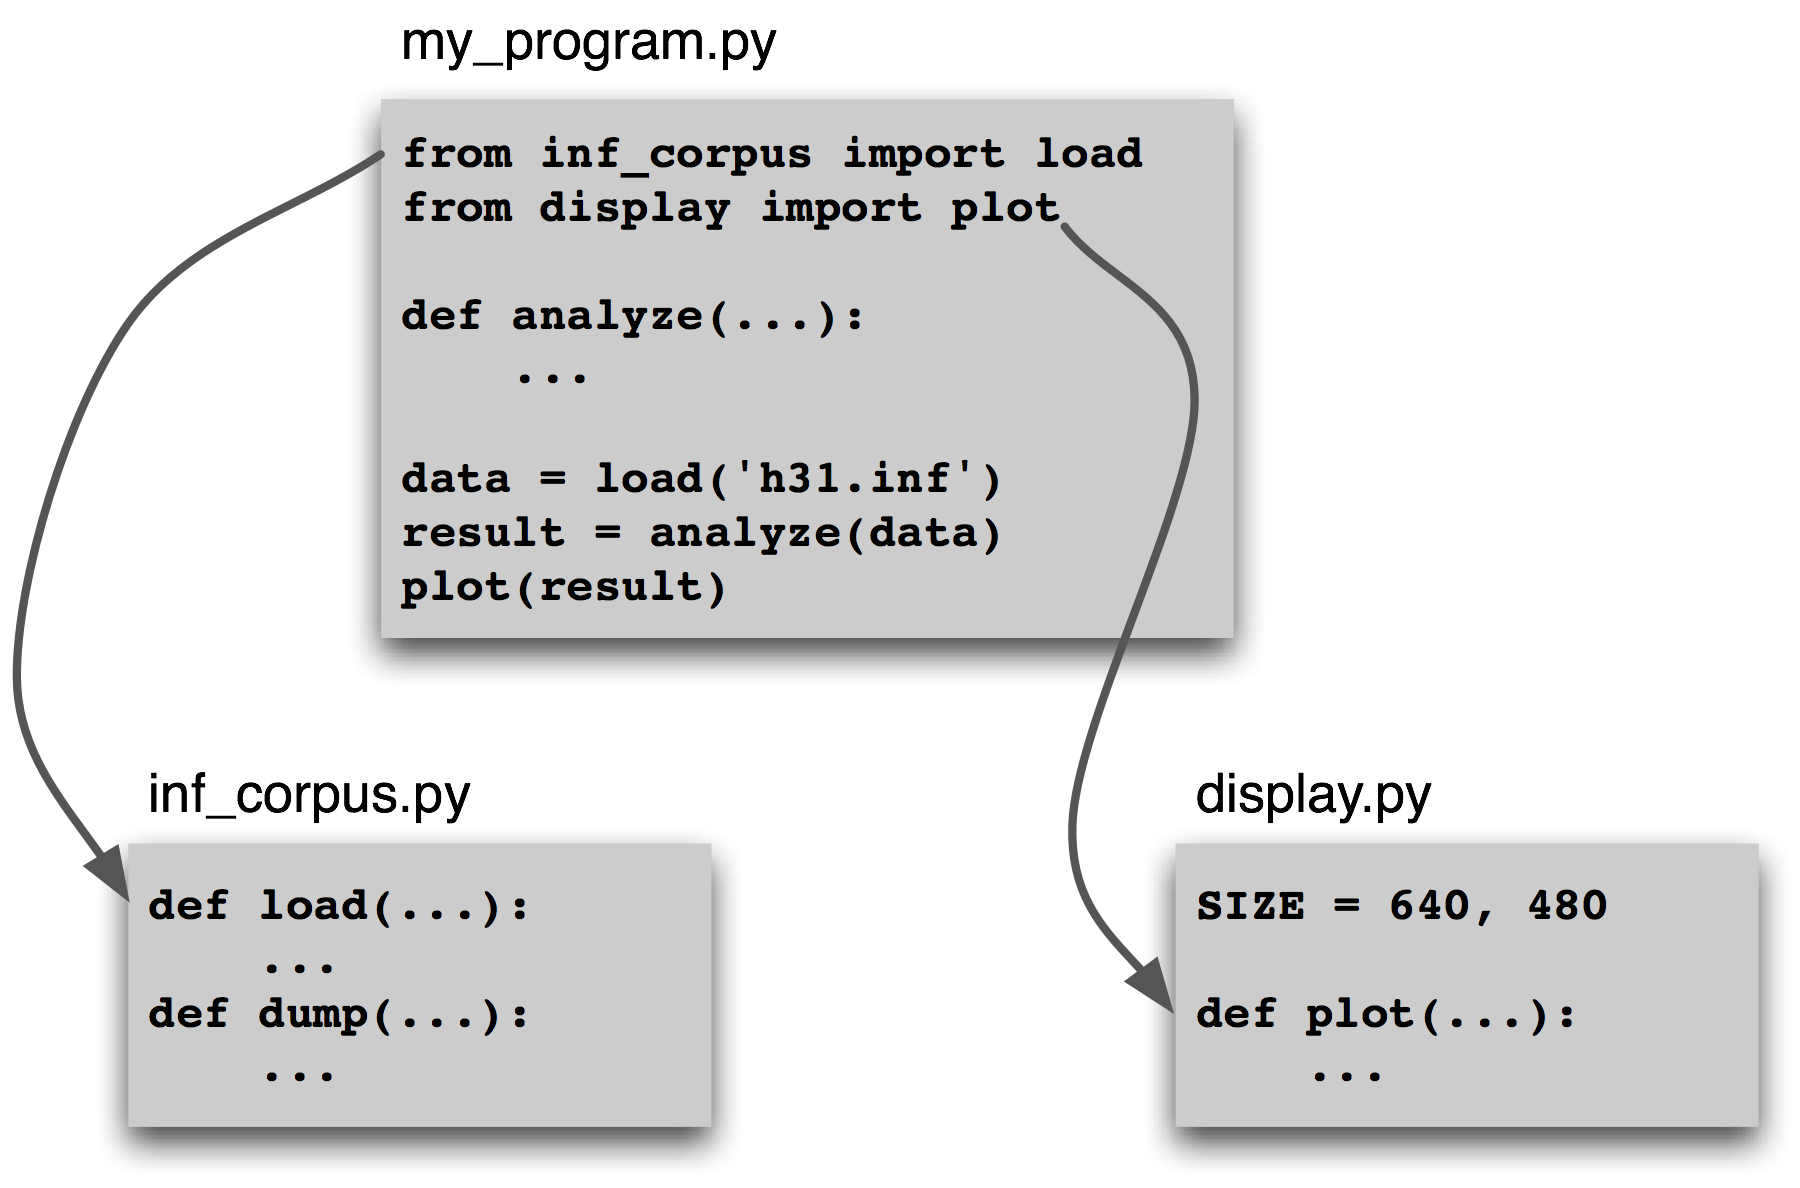

图 4.7：一个多模块程序的结构：主程序`my_program.py`从其他两个模块导入函数；独特的分析任务在主程序本地进行，而一般的载入和可视化任务被分离开以便可以重用和抽象。

通过将我们的工作分成几个模块和使用`import`语句访问别处定义的函数，我们可以保持各个模块简单，易于维护。这种做法也将导致越来越多的模块的集合，使我们有可能建立复杂的涉及模块间层次结构的系统。设计这样的系统是一个复杂的软件工程任务，这超出了本书的范围。

### 错误源头

掌握编程技术取决于当程序不按预期运作时各种解决问题的技能的总结。一些琐碎的东西，如放错位置的符号，可能导致程序的行为异常。我们把这些叫做“bugs”，因为它们与它们所导致的损害相比较小。它们不知不觉的潜入我们的代码，只有在很久以后，我们在一些新的数据上运行程序时才会发现它们的存在。有时，一个错误的修复仅仅是暴露出另一个，于是我们得到了鲜明的印象，bug 在移动。我们唯一的安慰是bugs是自发的而不是程序员的错误。

繁琐浮躁不谈，调试代码是很难的，因为有那么多的方式出现故障。我们对输入数据、算法甚至编程语言的理解可能是错误的。让我们分别来看看每种情况的例子。

首先，输入的数据可能包含一些意想不到的字符。例如，WordNet的同义词集名称的形式是`tree.n.01`，由句号分割成3个部分。最初NLTK的WordNet模块使用`split('.')`分解这些名称。然而，当有人试图寻找词PhD时，这种方法就不能用了，它的同义集名称是`ph.d..n.01`，包含4个逗号而不是预期的2个。解决的办法是使用`rsplit('.', 2)`利用最右边的句号最多分割两次，留下字符串`ph.d.`不变。虽然在模块发布之前已经测试过，但就在几个星期前有人检测到这个问题（见`http://code.google.com/p/nltk/issues/detail?id=297`）。

第二，提供的函数可能不会像预期的那样运作。例如，在测试NLTK中的WordNet接口时，一名作者注意到没有同义词集定义了反义词，而底层数据库提供了大量的反义词的信息。这看着像是WordNet接口中的一个错误，结果却是对WordNet本身的误解：反义词在词条中定义，而不是在义词集中。唯一的“bug”是对接口的一个误解（参见`http://code.google.com/p/nltk/issues/detail?id=98`）。

第三，我们对Python语义的理解可能出错。很容易做出关于两个操作符的相对范围的错误的假设。例如，`"%s.%s.%02d" % "ph.d.", "n", 1`产生一个运行时错误`TypeError: not enough arguments for format string`。这是因为百分号操作符优先级高于逗号运算符。解决办法是添加括号强制限定所需的范围。作为另一个例子，假设我们定义一个函数来收集一个文本中给定长度的所有词符。该函数有文本和词长作为参数，还有一个额外的参数，允许指定结果的初始值作为参数：

In [101]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) # 1

['omg', 'teh', 'teh', 'mat']

In [102]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur']) # 2

['ur', 'on']

In [103]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) # 3

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

我们第一次调用`find_words()` [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#find-words-1)，我们得到所有预期的三个字母的词。第二次，我们为result指定一个初始值，一个单元素列表`['ur']`，如预期，结果中有这个词连同我们的文本中的其他双字母的词。现在，我们再次使用 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#find-words-1)中相同的参数调用`find_words()` [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#find-words-3)，但我们得到了不同的结果！我们每次不使用第三个参数调用`find_words()`，结果都只会延长前次调用的结果，而不是以在函数定义中指定的空链表result开始。程序的行为并不如预期，因为我们错误地认为在函数被调用时会创建默认值。然而，它只创建了一次，在Python解释器加载这个函数时。这一个列表对象会被使用，只要没有给函数提供明确的值。

### 调试技术

由于大多数代码错误是因为程序员的不正确的假设，你检测bug要做的第一件事是检查你的假设。通过给程序添加`print`语句定位问题，显示重要的变量的值，并显示程序的进展程度。

如果程序产生一个“异常”——运行时错误——解释器会输出一个堆栈跟踪，精确定位错误发生时程序执行的位置。如果程序取决于输入数据，尽量将它减少到能产生错误的最小尺寸。

一旦你已经将问题定位在一个特定的函数或一行代码，你需要弄清楚是什么出了错误。使用交互式命令行重现错误发生时的情况往往是有益的。定义一些变量，然后复制粘贴可能出错的代码行到会话中，看看会发生什么。检查你对代码的理解，通过阅读一些文档和测试与你正在试图做的事情相同的其他代码示例。尝试将你的代码解释给别人听，也许他们会看出出错的地方。

Python提供了一个调试器，它允许你监视程序的执行，指定程序暂停运行的行号（即断点），逐步调试代码段和检查变量的值。你可以如下方式在你的代码中调用调试器：

In [ ]:
import pdb
import mymodule
pdb.run('mymodule.myfunction()')

它会给出一个提示`(Pdb)`，你可以在那里输入指令给调试器。输入`help`来查看命令的完整列表。输入`step`(或只输入`s`)将执行当前行然后停止。如果当前行调用一个函数，它将进入这个函数并停止在第一行。输入`next`(或只输入`n`)是类似的，但它会在当前函数中的下一行停止执行。`break`（或`b`）命令可用于创建或列出断点。输入`continue`（或`c`）会继续执行直到遇到下一个断点。输入任何变量的名称可以检查它的值。

我们可以使用Python调试器来查找`find_words()` 函数的问题。请记住问题是在第二次调用函数时产生的。我们一开始将不使用调试器而调用该函数 [_first-run_](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#id9)，使用可能的最小输入。第二次我们使用调试器调用它 [_second-run_](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#id11)。.. doctest-ignore:

In [105]:
import pdb
find_words(['cat'], 3) # [_first-run]

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']

In [ ]:
pdb.run("find_words(['dog'], 3)") # [_second-run]

### 防御性编程

为了避免一些调试的痛苦，养成防御性的编程习惯是有益的。不要写20行程序然后测试它，而是自下而上的打造一些明确可以运作的小的程序片。每次你将这些程序片组合成更大的单位都要仔细的看它是否能如预期的运作。考虑在你的代码中添加`assert`语句，指定变量的属性，例如`assert(isinstance(text, list))`。如果`text`的值在你的代码被用在一些较大的环境中时变为了一个字符串，将产生一个`AssertionError`，于是你会立即得到问题的通知。

一旦你觉得你发现了错误，作为一个假设查看你的解决方案。在重新运行该程序之前尝试预测你修正错误的影响。如果bug不能被修正，不要陷入盲目修改代码希望它会奇迹般地重新开始运作的陷阱。相反，每一次修改都要尝试阐明错误是什么和为什么这样修改会解决这个问题的假设。如果这个问题没有解决就撤消这次修改。

当你开发你的程序时，扩展其功能，并修复所有bug，维护一套测试用例是有益的。这被称为回归测试，因为它是用来检测代码“回归”的地方——修改代码后会带来一个意想不到的副作用是以前能运作的程序不运作了的地方。Python以`doctest`模块的形式提供了一个简单的回归测试框架。这个模块搜索一个代码或文档文件查找类似与交互式Python会话这样的文本块，这种形式你已经在这本书中看到了很多次。它执行找到的Python命令，测试其输出是否与原始文件中所提供的输出匹配。每当有不匹配时，它会报告预期值和实际值。有关详情，请查询在 documentation at `http://docs.python.org/library/doctest.html`上的`doctest`文档。除了回归测试它的值，`doctest`模块有助于确保你的软件文档与你的代码保持同步。

也许最重要的防御性编程策略是要清楚的表述你的代码，选择有意义的变量和函数名，并通过将代码分解成拥有良好文档的接口的函数和模块尽可能的简化代码。

## 4.7 算法设计

<a href="#递归">1. 递归</a>

<a href="#权衡空间与时间">2. 权衡空间与时间</a>

<a href="#动态规划">3. 动态规划</a>

<a href="#networkx">4. NetworkX</a>

<a href="#csv">5. csv</a>

<a href="#numpy">6. NumPy</a>

本节将讨论更高级的概念，你在第一次阅读本章时可能更愿意跳过本节。

解决算法问题的一个重要部分是为手头的问题选择或改造一个合适的算法。有时会有几种选择，能否选择最好的一个取决于对每个选择随数据增长如何执行的知识。关于这个话题的书很多，我们只介绍一些关键概念和精心描述在自然语言处理中最普遍的做法。

最有名的策略被称为分而治之。我们解决一个大小为*n*的问题通过将其分成两个大小为*n/2*的问题，解决这些问题，组合它们的结果成为原问题的结果。例如，假设我们有一堆卡片，每张卡片上写了一个词。我们可以排序这一堆卡片，通过将它分成两半分别给另外两个人来排序（他们又可以做同样的事情）。然后，得到两个排好序的卡片堆，将它们并成一个单一的排序堆就是一项容易的任务了。参见[4.8](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fig-mergesort)这个过程的说明。

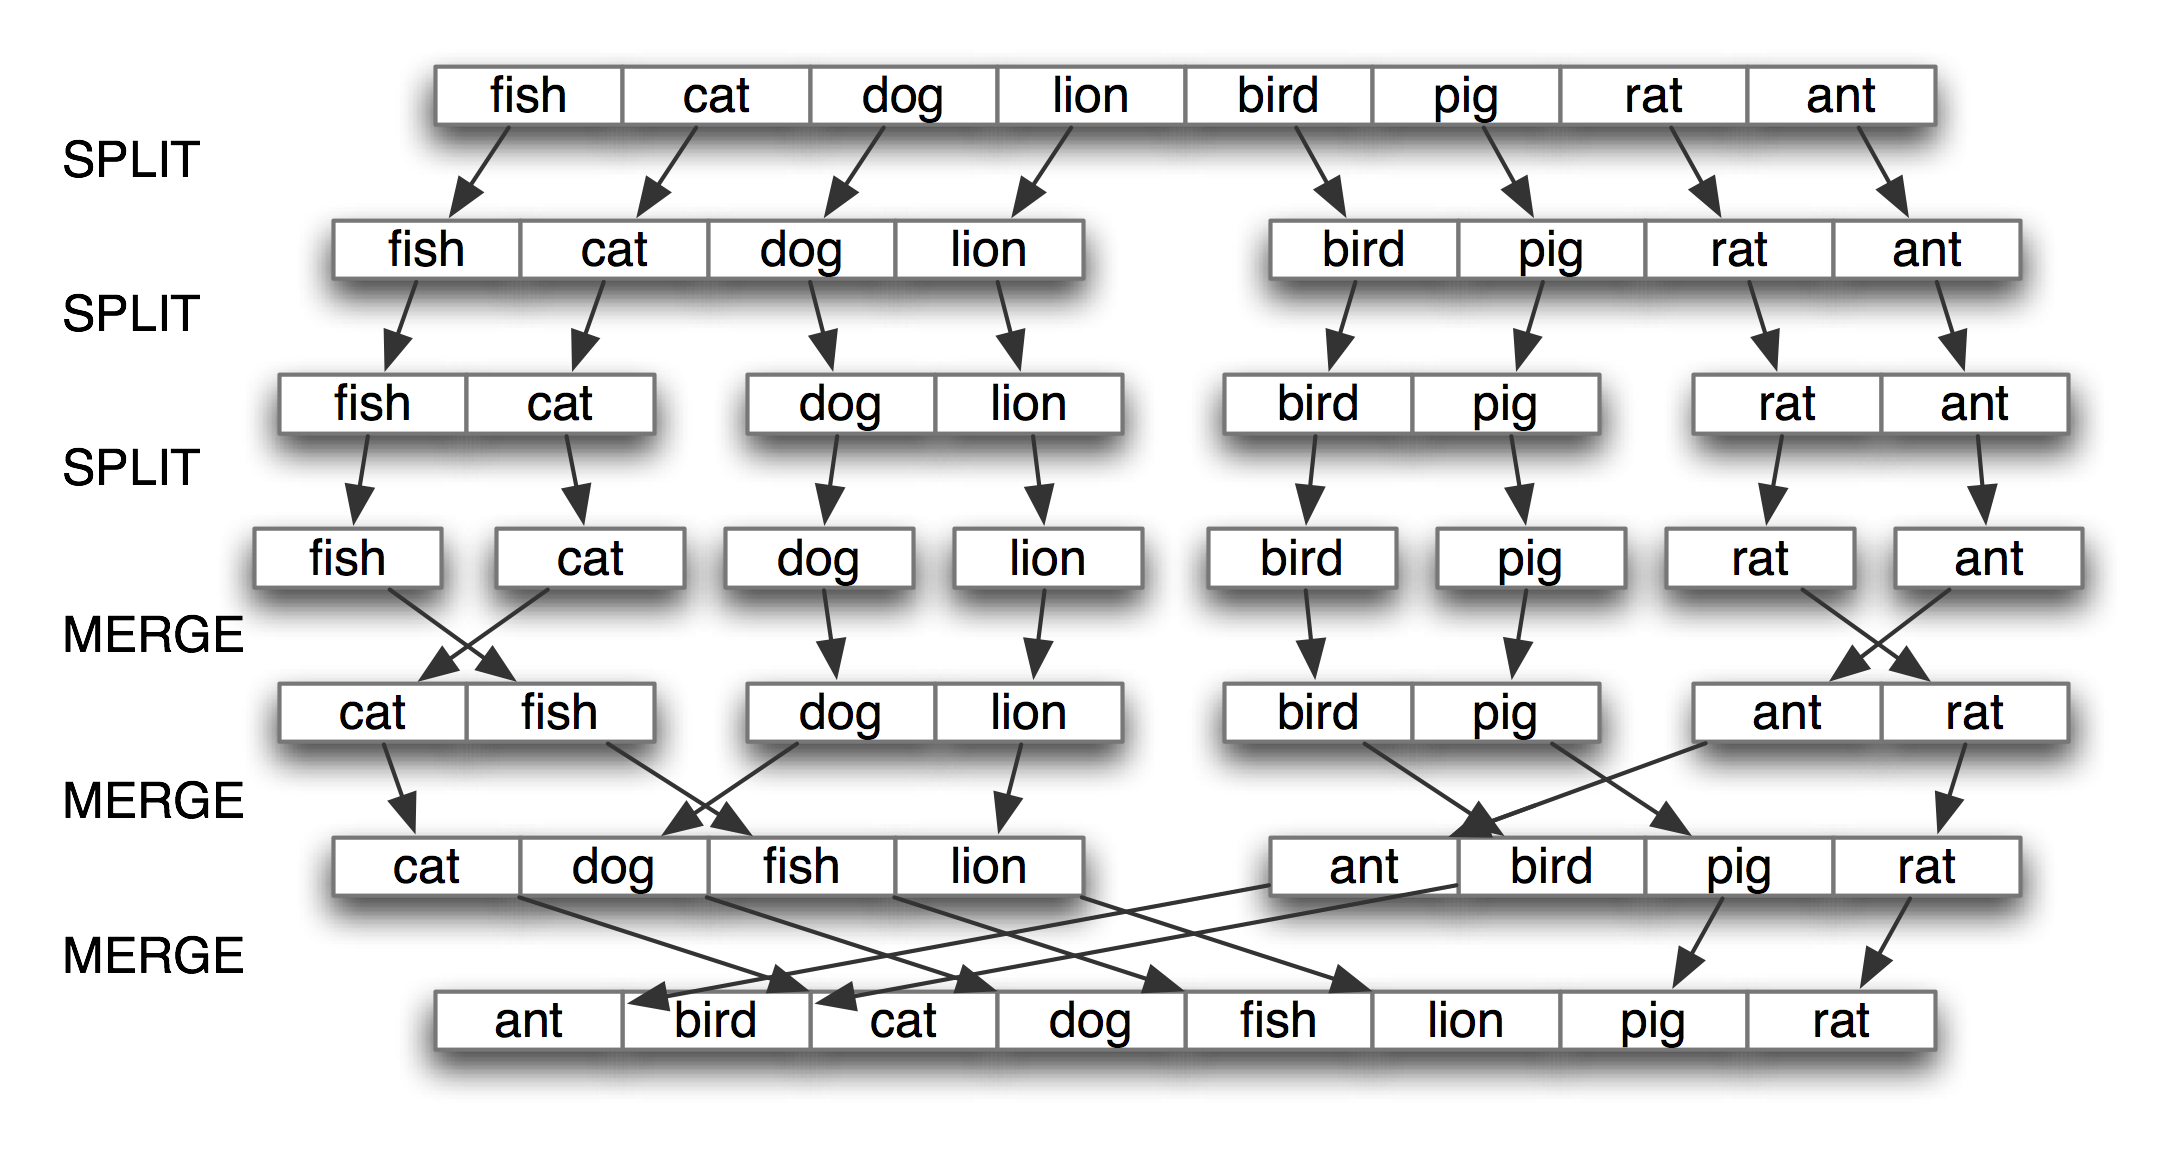

图 4.8：通过分而治之排序：对一个数组排序，我们将其分成两半并对每一半进行排序（递归）；将每个排好序的一半合并成一个完整的链表（再次递归）；这个算法被称为“归并排序“。

另一个例子是在词典中查找一个词的过程。我们打开在书的中部附近的一个地方，比较我们的词与当前页面上的词。如果它在词典中的词前面，我们就在词典的前一半重复上面的过程；如果它在后面，我们就使用词典的后一半。这种搜索方法被称为二分查找，因为它的每一步都将问题分裂成一半。

算法设计的另一种方法，我们解决问题通过将它转化为一个我们已经知道如何解决的问题的一个实例。例如，为了检测列表中的重复项，我们可以预排序这个列表，然后通过一次扫描检查是否有相邻的两个元素是相同的。

### 递归

上面的关于排序和搜索的例子有一个引人注目的特征：解决一个大小为n的问题，可以将其分成两半，然后处理一个或多个大小为n/2的问题。实现这种方法的一种常见方式是使用递归。我们定义一个函数f，从而简化了问题，并调用自身来解决一个或多个同样问题的更简单的实例。然后组合它们的结果成为原问题的解答。

例如，假设我们有n个词，要计算出它们结合在一起有多少不同的方式能组成一个词序列。如果我们只有一个词（n=1），只是一种方式组成一个序列。如果我们有2个词，就有2种方式将它们组成一个序列。3个词有6种可能性。一般的，n个词有n × n-1 × … × 2 × 1种方式（即n的阶乘）。我们可以将这些编写成如下代码：

In [108]:
def factorial1(n): # 一个跑了两分钟还不结束的代码
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

但是，也可以使用一种递归算法来解决这个问题，该算法基于以下观察。假设我们有办法为n-1 不同的词构建所有的排列。然后对于每个这样的排列，有n个地方我们可以插入一个新词：开始、结束或任意两个词之间的n-2个空隙。因此，我们简单的将n-1个词的解决方案数乘以n的值。我们还需要基础案例，也就是说，如果我们有一个词，只有一个顺序。我们可以将这些编写成如下代码：

In [109]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

这两种算法解决同样的问题。一个使用迭代，而另一个使用递归。我们可以用递归处理深层嵌套的对象，例如WordNet的上位词层次。让我们计数给定同义词集s为根的上位词层次的大小。我们会找到s的每个下位词的大小，然后将它们加到一起（我们也将加1 表示同义词集本身）。下面的函数`size1()`做这项工作；注意函数体中包括`size1()`的递归调用：

In [110]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

我们也可以设计一种这个问题的迭代解决方案处理层的层次结构。第一层是同义词集本身 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#first-layer)，然后是同义词集所有的下位词，之后是所有下位词的下位词。每次循环通过查找上一层的所有下位词计算下一层 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#update-layer)。它也保存了到目前为止遇到的同义词集的总数 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#update-total)。

In [111]:
def size2(s):
    layer = [s] 
    total = 0
    while layer:
        total += len(layer) 
        layer = [h for c in layer for h in c.hyponyms()] 
    return total

迭代解决方案不仅代码更长而且更难理解。它迫使我们程序式的思考问题，并跟踪`layer`和`total`随时间变化发生了什么。让我们满意的是两种解决方案均给出了相同的结果。我们将使用import语句的一个新的形式，允许我们缩写名称`wordnet`为`wn`：

In [112]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [113]:
size2(dog)

190

作为递归的最后一个例子，让我们用它来构建一个深嵌套的对象。一个字母查找树是一种可以用来索引词汇的数据结构，一次一个字母。（这个名字来自于单词retrieval）。例如，如果`trie`包含一个字母的查找树，那么`trie['c']`是一个较小的查找树，包含所有以c开头的词。[4.9](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-trie)演示了使用Python 字典（[3](https://usyiyi.github.io/nlp-py-2e-zh/ch05.html#sec-dictionaries)）构建查找树的递归过程。若要插入词chien（dog的法语），我们将c分类，递归的掺入hien到`trie['c']`子查找树中。递归继续直到词中没有剩余的字母，于是我们存储的了预期值（本例中是词dog）。

In [114]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

小心！

尽管递归编程结构简单，但它是有代价的。每次函数调用时，一些状态信息需要推入堆栈，这样一旦函数执行完成可以从离开的地方继续执行。出于这个原因，迭代的解决方案往往比递归解决方案的更高效。

### 权衡空间与时间

我们有时可以显著的加快程序的执行，通过建设一个辅助的数据结构，例如索引。[4.10](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-search-documents)实现一个简单的电影评论语料库的全文检索系统。通过索引文档集合，它提供更快的查找。

In [ ]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

一个更微妙的空间与时间折中的例子涉及使用整数标识符替换一个语料库的词符。我们为语料库创建一个词汇表，每个词都被存储一次的列表，然后转化这个列表以便我们能通过查找任意词来找到它的标识符。每个文档都进行预处理，使一个词列表变成一个整数列表。现在所有的语言模型都可以使用整数。见[4.11](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-strings-to-ints)中的内容，如何为一个已标注的语料库做这个的例子的列表。

In [116]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

空间时间权衡的另一个例子是维护一个词汇表。如果你需要处理一段输入文本检查所有的词是否在现有的词汇表中，词汇表应存储为一个集合，而不是一个列表。集合中的元素会自动索引，所以测试一个大的集合的成员将远远快于测试相应的列表的成员。

我们可以使用`timeit`模块测试这种说法。`Timer`类有两个参数：一个是多次执行的语句，一个是只在开始执行一次的设置代码。我们将分别使用一个整数的列表 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#vocab-list)和一个整数的集合 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#vocab-set)模拟10 万个项目的词汇表。测试语句将产生一个随机项，它有50％的机会在词汇表中 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#vocab-statement)。

In [117]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size 
setup_set = "import random; vocab = set(range(%d))" % vocab_size 
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2) 
print(Timer(statement, setup_list).timeit(1000))

0.0008371999997507373


In [118]:
print(Timer(statement, setup_set).timeit(1000))

0.0008661000001666253


执行1000 次链表成员资格测试总共需要2.8秒，而在集合上的等效试验仅需0.0037 秒，也就是说快了三个数量级！

### 动态规划

动态规划是一种自然语言处理中被广泛使用的算法设计的一般方法。“programming”一词的用法与你可能想到的感觉不同，是规划或调度的意思。动态规划用于解决包含多个重叠的子问题的问题。不是反复计算这些子问题，而是简单的将它们的计算结果存储在一个查找表中。在本节的余下部分，我们将介绍动态规划，在一个相当不同的背景下来句法分析。

Pingala是大约生活在公元前5世纪的印度作家，作品有被称为*《Chandas Shastra》*的梵文韵律专著。Virahanka大约在公元6 世纪延续了这项工作，研究短音节和长音节组合产生一个长度为*n*的旋律的组合数。短音节，标记为*S*，占一个长度单位，而长音节，标记为*L*，占2个长度单位。例如，Pingala 发现，有5 种方式构造一个长度为4 的旋律：*V*4 = *{LL, SSL, SLS, LSS, SSSS}*。请看，我们可以将*V*4分成两个子集，以*L*开始的子集和以*S*开始的子集，如[(1)](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#ex-v4)所示。

In [ ]:
V4 =
  LL, LSS
    i.e. L prefixed to each item of V2 = {L, SS}
  SSL, SLS, SSSS
    i.e. S prefixed to each item of V3 = {SL, LS, SSS}

有了这个观察结果，我们可以写一个小的递归函数称为`virahanka1()`来计算这些旋律，如[4.12](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-virahanka)所示。请注意，要计算*V*4，我们先要计算*V*3和*V*2。但要计算*V*3，我们先要计算*V*2和*V*1。在[(2)](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#ex-call-structure)中描述了这种调用结构。

In [120]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

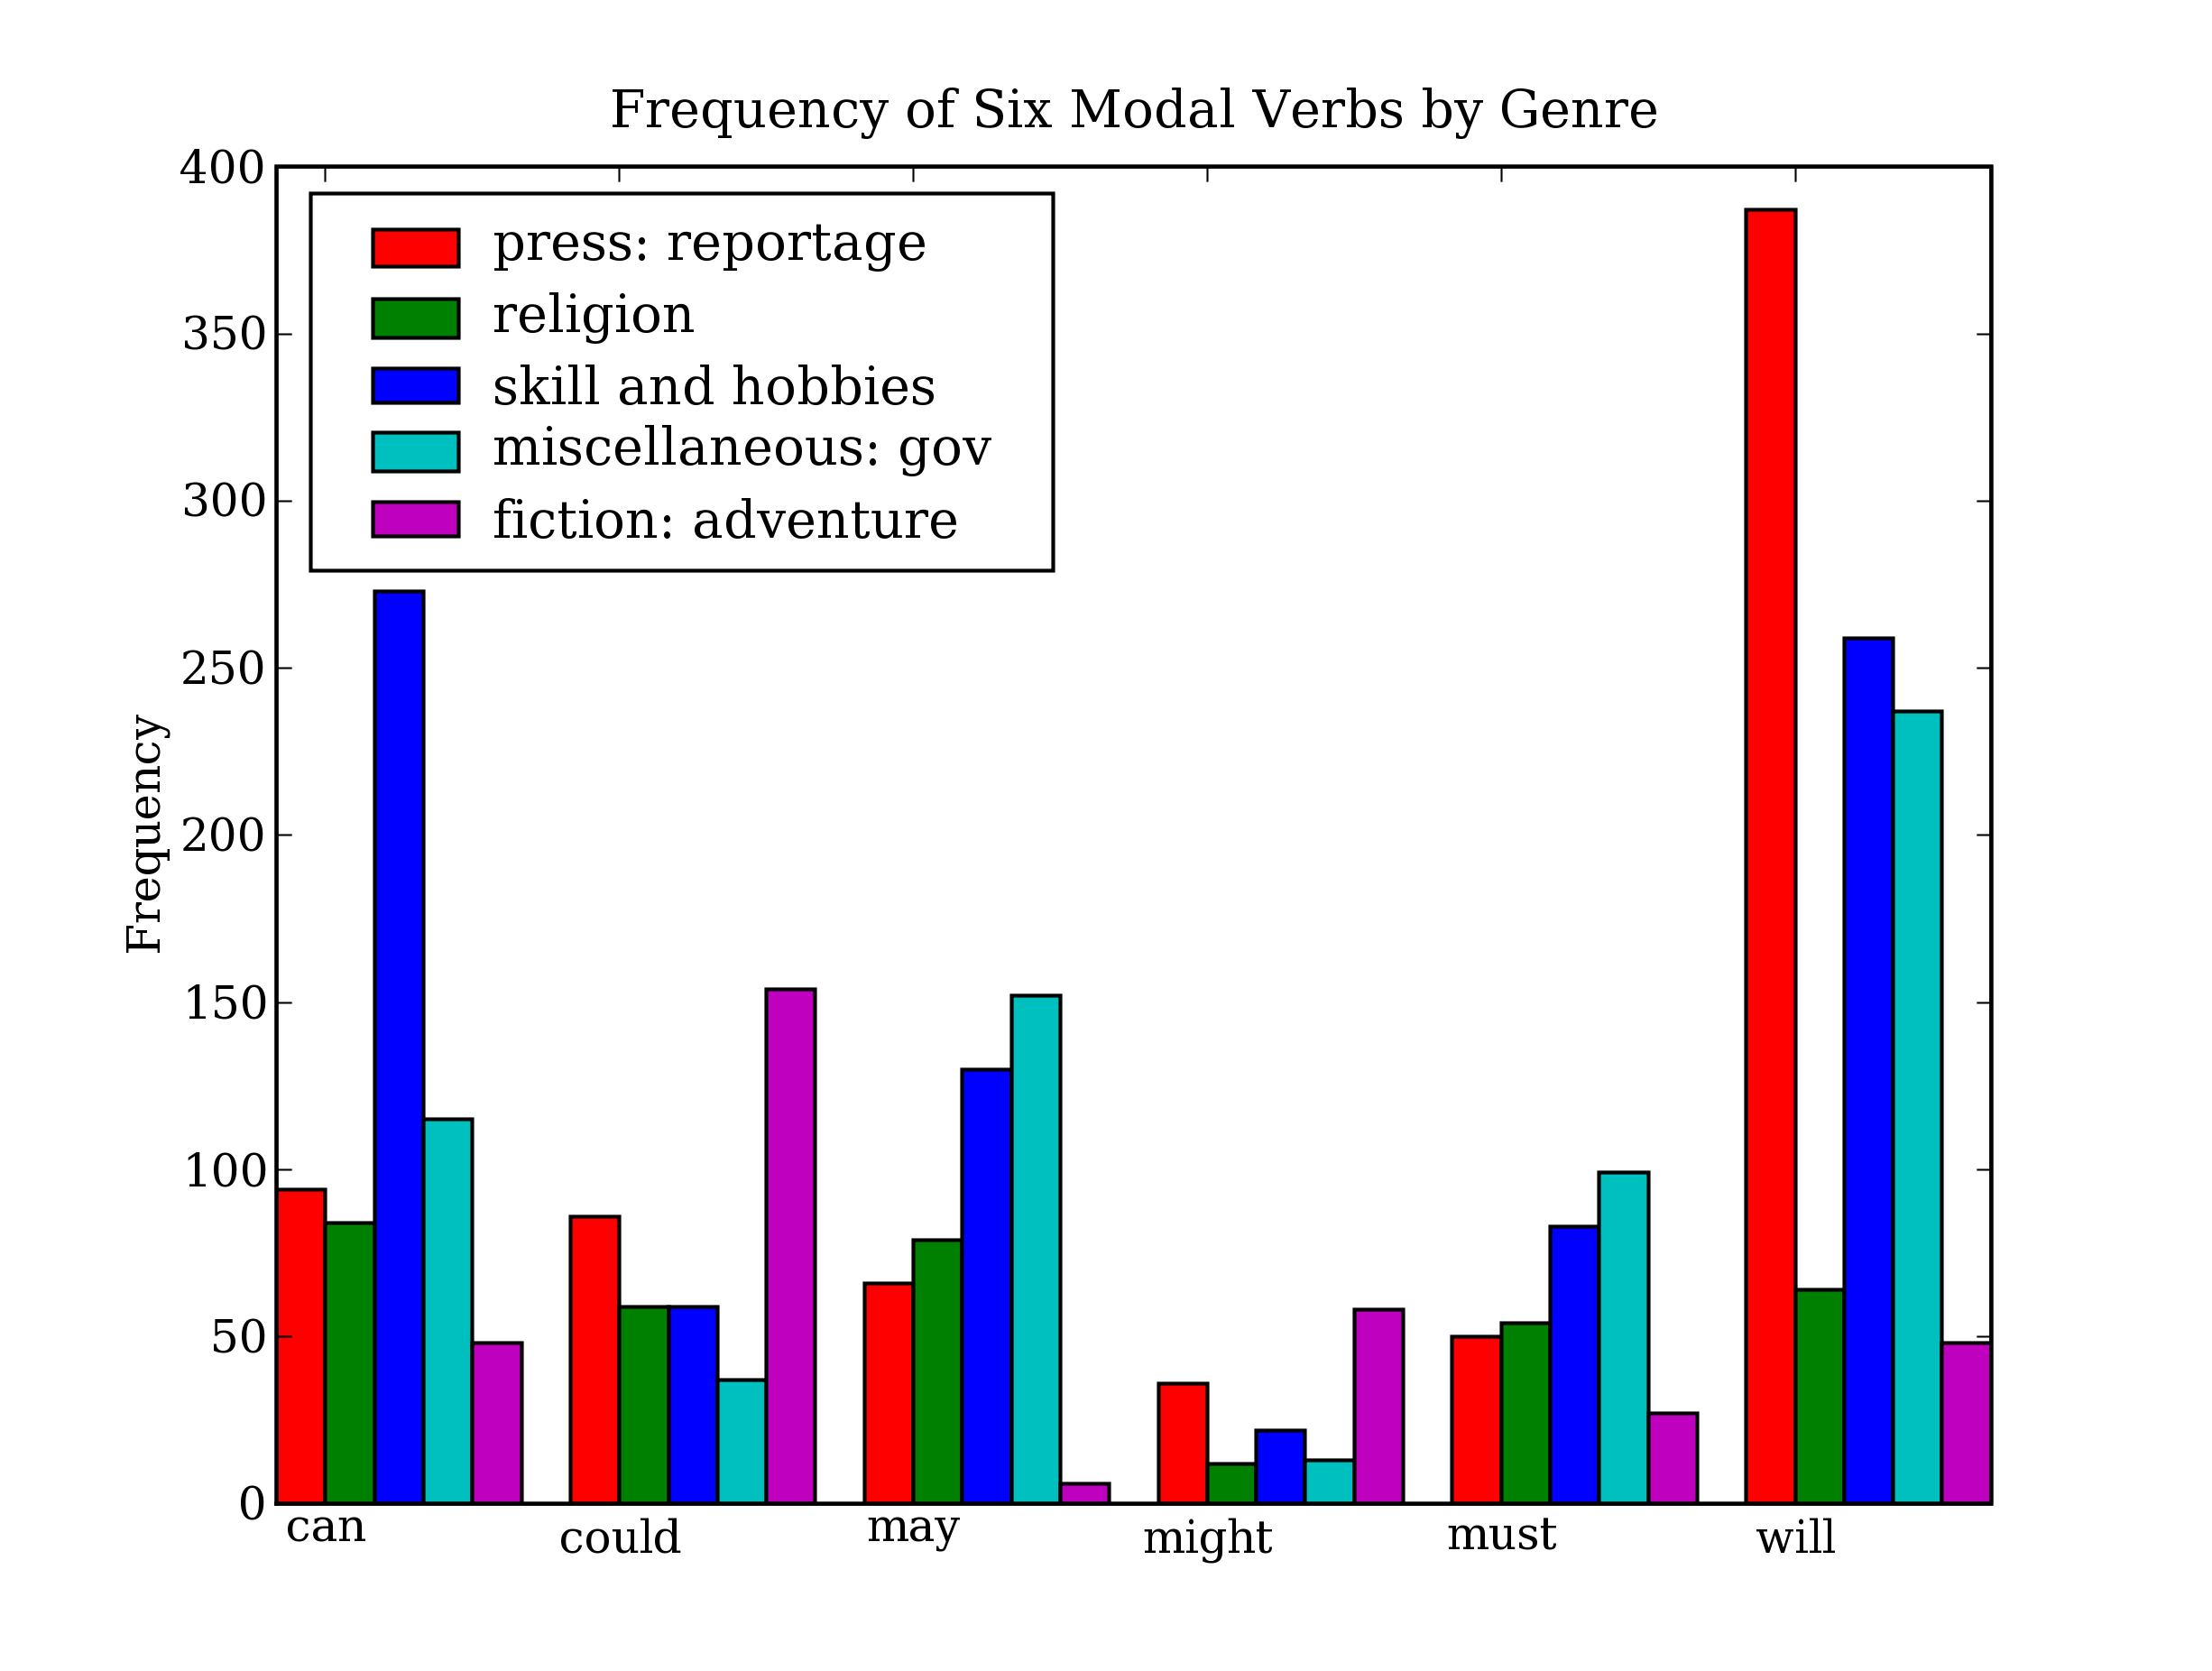

图 4.14：条形图显示布朗语料库中不同部分的情态动词频率：这个可视化图形由[4.13](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-modal-plot)中的程序产生。

从该柱状图可以立即看出may和must有几乎相同的相对频率。could和might也一样。

也可以动态的产生这些数据的可视化图形。例如，一个使用表单输入的网页可以允许访问者指定搜索参数，提交表单，看到一个动态生成的可视化图形。要做到这一点，我们必须为`matplotlib`指定`Agg`后台，它是一个产生栅格（像素）图像的库 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#agg-backend)。下一步，我们像以前一样使用相同的Matplotlib 方法，但不是用`pyplot.show()`显示结果在图形终端，而是使用`pyplot.savefig()`把它保存到一个文件 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#pyplot-savefig)。我们指定文件名，然后输出一些HTML标记指示网页浏览器来加载该文件。

In [121]:
from matplotlib import use, pyplot
use('Agg') 
pyplot.savefig('modals.png') 
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


### NetworkX

NetworkX包定义和操作被称为图的由节点和边组成的结构。它可以从`https://networkx.lanl.gov/`得到。NetworkX可以和Matplotlib 结合使用可视化如WordNet的网络结构（语义网络，我们在[5](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-wordnet)介绍过）。[4.15](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-networkx)中的程序初始化一个空的图 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#define-graph)，然后遍历WordNet上位词层次为图添加边 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#add-edge)。请注意，遍历是递归的 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#recursive-traversal)，使用在[4.7](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-algorithm-design)讨论的编程技术。结果显示在[4.16](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#fig-dog-graph)。

In [122]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) 
        traverse(graph, start, child) 

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

![Images/dog-graph.png](https://usyiyi.github.io/nlp-py-2e-zh/Images/8cb61a943f3d34f94596e77065410cd3.jpg)

图 4.16：使用NetworkX和Matplotlib可视化数据：WordNet的上位词层次的部分显示，开始于`dog.n.01`（中间最黑的节点）；节点的大小对应节点的孩子的数目，颜色对应节点到`dog.n.01`的距离；此可视化图形由[4.15](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#code-networkx)中的程序产生。

### csv

语言分析工作往往涉及数据统计表，包括有关词项的信息、试验研究的参与者名单或从语料库提取的语言特征。这里有一个CSV格式的简单的词典片段：

sleep, sli:p, v.i, a condition of body and mind 

walk, wo:k, v.intr, progress by lifting and setting down each foot 

wake, weik, intrans, cease to sleep

我们可以使用Python的CSV库读写这种格式存储的文件。例如，我们可以打开一个叫做`lexicon.csv`的CSV 文件 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#open-csv)，并遍历它的行 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#iterate-csv)：

In [ ]:
import csv
input_file = open("lexicon.csv", "rb") 
for row in csv.reader(input_file): 
    print(row)

每一行是一个字符串列表。如果字段包含有数值数据，它们将作为字符串出现，所以都必须使用`int()`或`float()`转换。

### NumPy

NumPy包对Python中的数值处理提供了大量的支持。NumPy有一个多维数组对象，它可以很容易初始化和访问：

In [124]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
               [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1,1,1]

4

In [125]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [126]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

NumPy包括线性代数函数。在这里我们进行矩阵的奇异值分解，潜在语义分析中使用的操作，它能帮助识别一个文档集合中的隐含概念。

In [127]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [128]:
s

array([6.32455532, 3.16227766])

In [129]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

NLTK中的聚类包`nltk.cluster`中广泛使用NumPy数组，支持包括k-means聚类、高斯EM聚类、组平均凝聚聚类以及聚类分析图。有关详细信息，请输入`help(nltk.cluster)`。

### 其他Python库

还有许多其他的Python库，你可以使用`http://pypi.python.org/`处的Python 包索引找到它们。许多库提供了外部软件接口，例如关系数据库（如`mysql-python`）和大数据集合（如`PyLucene`）。许多其他库能访问各种文件格式，如PDF、MSWord 和XML（`pypdf`, `pywin32`, `xml.etree`）、RSS 源（如`feedparser`）以及电子邮箱（如`imaplib`, `email`）。

## 6 小结

- Python 赋值和参数传递使用对象引用，例如如果`a`是一个列表，我们分配`b = a`，然后任何`a`上的操作都将修改`b`，反之亦然。
- `is`操作测试是否两个对象是相同的内部对象，而`==`测试是否两个对象是相等的。两者的区别和词符与词类型的区别相似。
- 字符串、列表和元组是不同类型的序列对象，支持常见的操作如：索引、切片、`len()`、`sorted()`和使用`in`的成员测试。
- 声明式的编程风格通常会产生更简洁更可读的代码；手动递增循环变量通常是不必要的；枚举一个序列，使用`enumerate()`。
- 函数是一个重要的编程抽象，需要理解的关键概念有：参数传递、变量的作用域和文档字符串。
- 函数作为一个命名空间：函数内部定义的名称在该函数外不可见，除非这些名称被宣布为是全局的。
- 模块允许将材料与本地的文件逻辑的关联起来。一个模块作为一个命名空间：在一个模块中定义的名称——如变量和函数——在其他模块中不可见，除非这些名称被导入。
- 动态规划是一种在NLP 中广泛使用的算法设计技术，它存储以前的计算结果，以避免不必要的重复计算。

## 4.10 深入阅读

本章已经触及编程中的许多主题，一些是Python特有的，一些是相当普遍的。我们只是触及了表面，你可能想要阅读更多有关这些主题的内容，可以从`http://nltk.org/`处的本章深入阅读材料开始。

Python网站提供大量文档。理解内置的函数和标准类型是很重要的，在`http://docs.python.org/library/functions.html`和`http://docs.python.org/library/stdtypes.html`处有描述。我们已经学习了生成器以及它们对提高效率的重要性；关于迭代器的信息，一个密切相关的话题请看`http://docs.python.org/library/itertools.html`。查询你喜欢的Python书籍中这些主题的更多信息。使用Python进行多媒体处理包括声音文件的一个优秀的资源是[(Guzdial, 2005)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#guzdial2005)。

使用在线Python文档时，要注意你安装的版本可能与你正在阅读的文档的版本不同。你可以使用`import sys; sys.version`松地查询你有的是什么版本。特定版本的文档在`http://www.python.org/doc/versions/`处。

算法设计是计算机科学中一个丰富的领域。一些很好的出发点是[(Harel, 2004)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#harel2004), [(Levitin, 2004)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#levitin2004), [(Knuth, 2006)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#knuth2006trees)。[(Hunt & Thomas, 2000)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#hunt2000)和[(McConnell, 2004)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#mcconnell2004)为软件开发实践提供了有益的指导。

## 4.11 练习

1. ☼ 使用Python的帮助功能，找出更多关于序列对象的内容。在解释器中输入`help(str)`，`help(list)`和`help(tuple)`。这会给你一个每种类型支持的函数的完整列表。一些函数名字有些特殊，两侧有下划线；正如帮助文档显示的那样，每个这样的函数对应于一些较为熟悉的东西。例如`x.__getitem__(y)`仅仅是以长篇大论的方式使用`x[y]`。

2. ☼ 确定三个同时在元组和链表上都可以执行的操作。确定三个不能在元组上执行的列表操作。命名一段使用列表替代元组会产生一个Python错误的代码。

3. ☼ 找出如何创建一个由单个项目组成的元组。至少有两种方法可以做到这一点。

4. ☼ 创建一个列表`words = ['is', 'NLP', 'fun', '?']`。使用一系列赋值语句（如`words[1] = words[2]`）和临时变量`tmp`将这个列表转换为列表`['NLP', 'is', 'fun', '!']`。现在，使用元组赋值做相同的转换。

5. ☼ 通过输入`help(cmp)`阅读关于内置的比较函数`cmp`的内容。它与比较运算符在行为上有何不同？

6. ☼ 创建一个n-grams的滑动窗口的方法在下面两种极端情况下是否正确：n = 1 和n = `len(sent)`？

7. ☼ 我们指出当空字符串和空链表出现在`if`从句的条件部分时，它们的判断结果是`False`。在这种情况下，它们被说成出现在一个布尔上下文中。实验各种不同的布尔上下文中的非布尔表达式，看它们是否被判断为`True`或`False`。

8. ☼ 使用不等号比较字符串，如`'Monty' < 'Python'`。当你做`'Z' < 'a'`时会发生什么？尝试具有共同前缀的字符串对，如`'Monty' < 'Montague'`。阅读有关“字典排序”的内容以便了解这里发生了什么事。尝试比较结构化对象，如`('Monty', 1) < ('Monty', 2)`。这与预期一样吗？

9. ☼ 写代码删除字符串开头和结尾处的空白，并规范化词之间的空格为一个单独的空格字符。

   1. 使用`split()`和`join()`做这个任务
   2. 使用正则表达式替换做这个任务

10. ☼ 写一个程序按长度对词排序。定义一个辅助函数`cmp_len`，它在词长上使用`cmp`比较函数。

11. ◑ 创建一个词列表并将其存储在变量`sent1`。现在赋值`sent2 = sent1`。修改`sent1`中的一个项目，验证`sent2`改变了。

1. 现在尝试同样的练习，但使用`sent2 = sent1[:]`赋值。再次修改`sent1`看看`sent2`会发生什么。解释。
2. 现在定义`text1`为一个字符串列表的列表（例如表示由多个句子组成的文本）。现在赋值`text2 = text1[:]`，分配一个新值给其中一个词，例如`text1[1][1] = 'Monty'`。检查这对`text2`做了什么。解释。
3. 导入Python的`deepcopy()`函数（即`from copy import deepcopy`），查询其文档，使用它生成任一对象的新副本。

12. ◑ 使用列表乘法初始化*n*-by-*m*的空字符串列表的咧表，例如`word_table = [[''] * n] * m`。当你设置其中一个值时会发生什么事，例如`word_table[1][2] = "hello"`？解释为什么会出现这种情况。现在写一个表达式，使用`range()`构造一个列表，表明它没有这个问题。

13. ◑ 写代码初始化一个称为`word_vowels`的二维数组的集合，处理一个词列表，添加每个词到`word_vowels[l][v]`，其中`l`是词的长度，`v`是它包含的元音的数量。

14. ◑ 写一个函数`novel10(text)`输出所有在一个文本最后10%出现而之前没有遇到过的词。

15. ◑ 写一个程序将一个句子表示成一个单独的字符串，分割和计数其中的词。让它输出每一个词和词的频率，每行一个，按字母顺序排列。

16. ◑ 阅读有关Gematria的内容，它是一种方法，分配一个数字给词汇，具有相同数字的词之间映射以发现文本隐藏的含义（`http://en.wikipedia.org/wiki/Gematria`, `http://essenes.net/gemcal.htm`）。

1. 写一个函数`gematria()`，根据`letter_vals`中的字母值，累加一个词的字母的数值：

   ```
   letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,
   'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,
   'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}
   ```

2. 处理一个语料库（`nltk.corpus.state_union`）对每个文档计数它有多少词的字母数值为666。

3. 写一个函数`decode()`来处理文本，随机替换词汇为它们的Gematria等值的词，以发现文本的“隐藏的含义”。

17. ◑ 写一个函数`shorten(text, n)`处理文本，省略文本中前n个最频繁出现的词。它的可读性会如何？

18. ◑ 写代码输出词汇的索引，允许别人根据其含义查找词汇（或它们的发言；词汇条目中包含的任何属性）。

19. ◑ 写一个列表推导排序WordNet中与给定同义词集接近的同义词集的列表。例如，给定同义词集`minke_whale.n.01`, `orca.n.01`, `novel.n.01`和`tortoise.n.01`，按照它们与`right_whale.n.01`的`shortest_path_distance()`对它们进行排序。

20. ◑ 写一个函数处理一个词列表（含重复项），返回一个按照频率递减排序的词列表（没有重复项）。例如如果输入列表中包含词`table`的10个实例，`chair`的9个实例，那么在输出列表中`table`会出现在`chair`前面。

21. ◑ 写一个函数以一个文本和一个词汇表作为它的参数，返回在文本中出现但不在词汇表中的一组词。两个参数都可以表示为字符串列表。你能使用`set.difference()`在一行代码中做这些吗？

22. ◑ 从Python标准库的`operator`模块导入`itemgetter()`函数（即`from operator import itemgetter`）。创建一个包含几个词的列表`words`。现在尝试调用：`sorted(words, key=itemgetter(1))`和`sorted(words, key=itemgetter(-1))`。解释`itemgetter()`正在做什么。

23. ◑ 写一个递归函数`lookup(trie, key)`在查找树中查找一个关键字，返回找到的值。扩展这个函数，当一个词由其前缀唯一确定时返回这个词（例如`vanguard`是以`vang-`开头的唯一的词，所以`lookup(trie, 'vang')`应该返回与`lookup(trie, 'vanguard')`相同的内容）。

24. ◑ 阅读关于“关键字联动”的内容（[(Scott & Tribble, 2006)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#scott2006)的第5章）。从NLTK的莎士比亚语料库中提取关键字，使用NetworkX包，画出关键字联动网络。

25. ◑ 阅读有关字符串编辑距离和Levenshtein 算法的内容。尝试`nltk.edit_distance()`提供的实现。这用的是动态规划的何种方式？它使用的是自下而上还是自上而下的方法？[另见`http://norvig.com/spell-correct.html`]

26. ◑ Catalan 数出现在组合数学的许多应用中，包括解析树的计数（[6](https://usyiyi.github.io/nlp-py-2e-zh/ch08.html#sec-grammar-development)）。该级数可以定义如下：C0 = 1, and Cn+1 = Σ0..n (CiCn-i)。

1. 编写一个递归函数计算第n个Catalan数Cn。
2. 现在写另一个函数使用动态规划做这个计算。
3. 使用`timeit`模块比较当n增加时这些函数的性能。

27. ★ 重现有关著作权鉴定的[(Zhao & Zobel, 2007)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#zhao07)中的一些结果。

28. ★ 研究性别特异词汇选择，看你是否可以重现一些`http://www.clintoneast.com/articles/words.php`的结果

29. ★ 写一个递归函数漂亮的按字母顺序排列输出一个查找树，例如:

```
chair: 'flesh'
---t: 'cat'
--ic: 'stylish'
---en: 'dog'
```

## Docutils System Messages

System Message: ERROR/3 (`ch04.rst2`, line 1791); *[backlink](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#id10)*

Unknown target name: "first-run".

System Message: ERROR/3 (`ch04.rst2`, line 1791); *[backlink](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#id12)*

Unknown target name: "second-run".